## 신경망모델

- 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [3]:
from sklearn.datasets  import load_breast_cancer
from sklearn.preprocessing import  StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [4]:
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 1. 데이터를 정규/표준화 하지 않은 경우

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [9]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정(컴파일)

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

- 모델 학습

In [11]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,       # 학습중 검증용
                    epochs=100,                 # 반복 횟수
                    batch_size=100)             # 동시에 몇개의 데이트를 메모리에 로드하는가

Epoch 1/100
4/4 [==============================] - 2s 143ms/step - loss: 28.3962 - accuracy: 0.3599 - val_loss: 6.1755 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 5.2835 - accuracy: 0.6016 - val_loss: 9.8130 - val_accuracy: 0.5714
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 4.6699 - accuracy: 0.6868 - val_loss: 0.4139 - val_accuracy: 0.8132
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.9822 - accuracy: 0.5302 - val_loss: 2.7432 - val_accuracy: 0.4835
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5463 - accuracy: 0.6044 - val_loss: 0.1660 - val_accuracy: 0.9231
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8782 - accuracy: 0.8379 - val_loss: 1.0185 - val_accuracy: 0.7912
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9335 - accuracy: 0.8352 - val_loss: 0.1449 - val_accuracy: 0.9451
Epoch 8/100
4/4 [=

- 모델 평가

In [12]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9298


[0.2212037593126297, 0.9298245906829834]

- 훈련과정 시각화
    - epoch에 따른 accuracy, val_loss의 변화

In [13]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

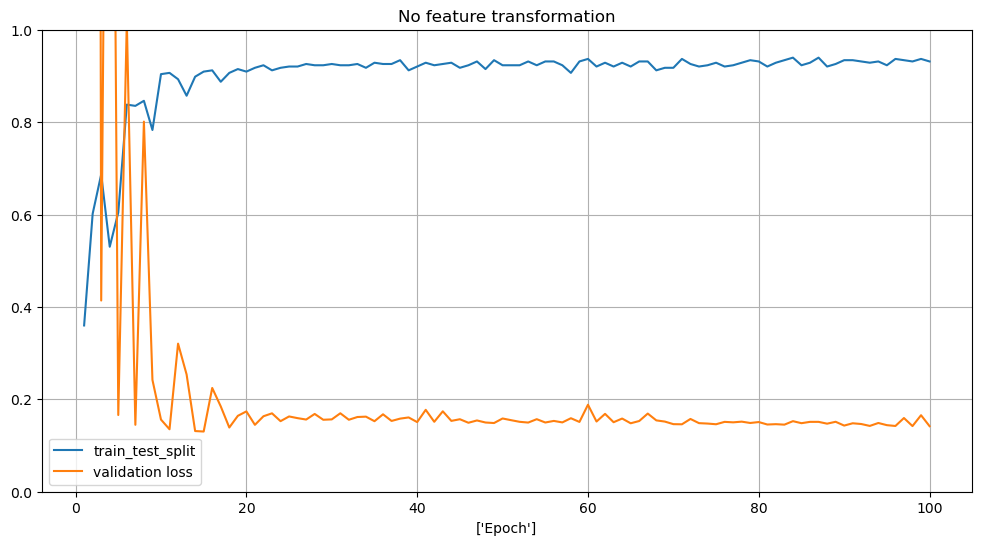

In [16]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train_test_split')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1]), plt.xlabel(['Epoch'])
plt.title('No feature transformation')
plt.show()

#### 2. 데이터를 표준화한 경우

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [19]:
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 24)                2424      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 모델 컴파일
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [21]:
# 모델 학습
history2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                      epochs=100, batch_size=100, verbose=0)

In [22]:
# 모델 평가
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.9561


[0.2836807072162628, 0.9561403393745422]

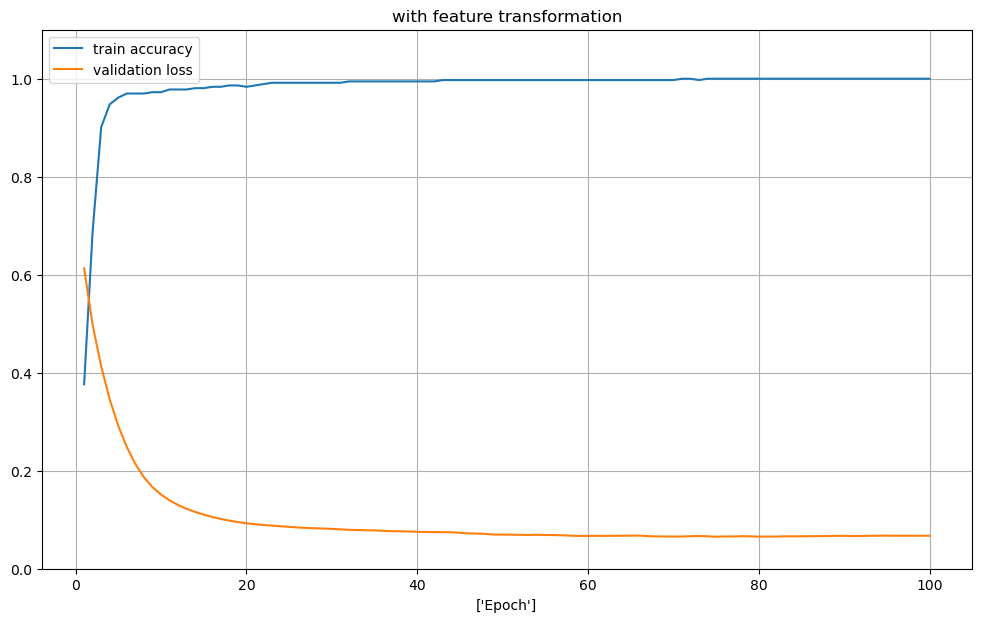

In [24]:
# 학습과정 시각화
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']

plt.figure(figsize=(12,7))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1]), plt.xlabel(['Epoch'])
plt.title('with feature transformation')
plt.show()